### Problem Statement

A US bike-sharing provider, BoomBikes, who has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic, wants to understand the factors affecting the demand for these shared bikes in the American market post-lockdown.

The company wants to know:

 - _Which variables are significant in predicting the demand for shared bikes?_
 - _How well those variables describe the bike demands._
 - _You are required to model the demand for shared bikes with the available independent variables._
 - _The model should be built taking this '___cnt___' as the target variable._
 - _Calculate the R-squared score on the test set_


#### Submissions Expected:
 * __Python Notebook__: One Python notebook with the whole linear model, predictions, and evaluation.
 * __Subjective Questions PDF__: Answer these subjective questions related to linear regression and submit it as a PDF. 


### Import libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# modelling libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn import metrics

### Reading and Understanding the Data

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Find number of records
bikes.shape

# 730 rows & 15 columns

(730, 16)

In [4]:
# Find info of features in the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Descriptive statistics
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Check for missing values:

In [6]:
#Checking data set for any null values.
bikes.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 - *No null records observed*

#### Drop Columns

Remove columns that add redundant information:

In [7]:
bikes.drop(columns=['instant','dteday','casual','registered','holiday'], inplace=True)
bikes.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


*Explanation:*
 - *instant is an index column that we don't need.*
 - *We already know the year, month and day (weekday, workingday) - having a date column is redundant.*
 - *cnt is the total sum of casual and registered users. Also, the count of casual & registrered users keep changing each day.*
 - *workingday already tells us if its a working day or not.*

#### Features Split-up:

 - ___Categorical columns___: season, mnth, weathersit, weekday
 - ___Numerical columns___: windspeed, hum, temp, atemp, cnt
 - ___Binary columns___: yr, workingday

#### Renaming features for additional clarity

In [8]:
bikes.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bikes.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Re-mapping the Categorical columns

In [9]:
bikes['season'] = bikes.season.map(
    {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bikes['month'] = bikes.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
                                 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bikes['weathersit'] = bikes.weathersit.map(
    {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
bikes['weekday'] = bikes.weekday.map(
    {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

bikes.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


 - *As categorical columns are encoded in numerical values, we convert them to their original categorical values.*
 - *As workingday is always 0 for weekday 6 & 0, we assume 6 represents Saturday & 0 represents Sunday.*

### Find relation through data visualization

#### Visualizing Numerical Features

In [10]:
# Numerical Features
num_var = ['temp', 'atemp','humidity', 'windspeed', 'count']

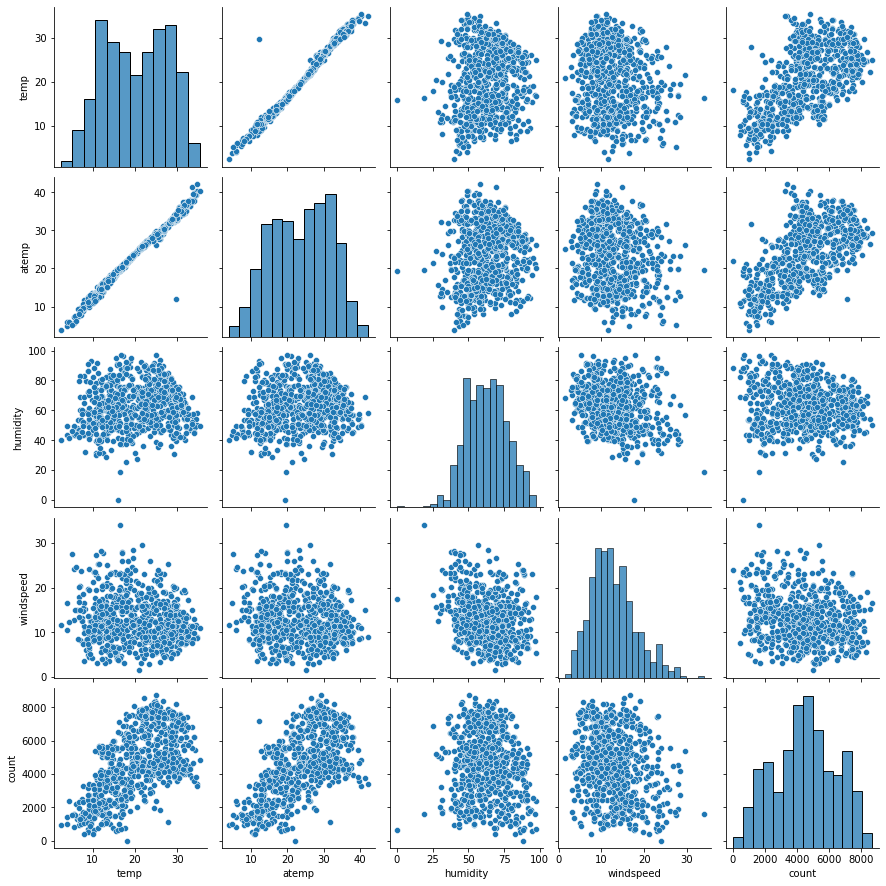

In [11]:
sns.pairplot(data=bikes[num_var])

*Observations:*

 - *Count of bikes share a near-dentical positive correlation with temperature and heat index (atemp) i.e. demand in bikes increases as the temperature rises up.*
 - *There's a negative correlation between bikes rented and humidity and windspeed i.e. need for bikes goes down as the humidity or windspeed climbs up.*

#### Visualizing Categorical Features

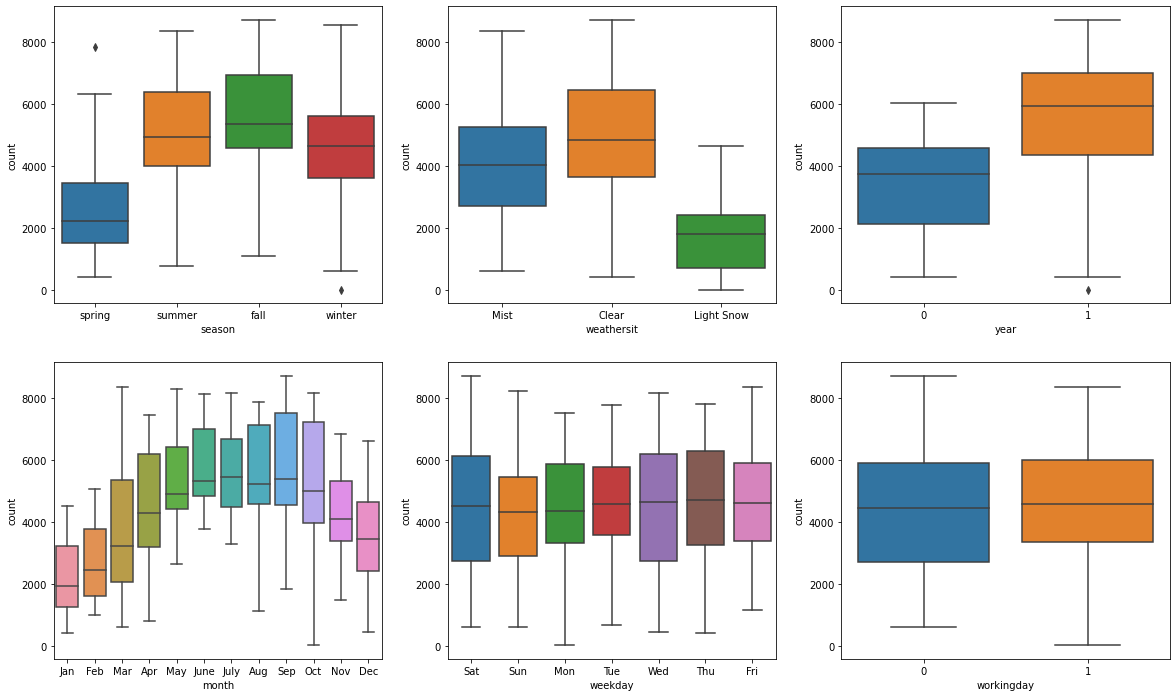

In [12]:
# Create boxplots for each categorical feature

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'count', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'year', y = 'count', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'month', y = 'count', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bikes)

plt.show()

*Observations:*

 - *People rent bikes most often during fall and summer; they prefer it least during spring.*
 - *Bikes have high demand when the skies are clear or partly cloudy & least wanted during light or heavy shower/snow.*
 - *Demand for bikes has increased considerably from the year 2018 to 2019.*
 - *People use bikes most often from June to September, peaking at September.*
 - *Average count of bikes are similar across weekdays with increased variations on Saturday & Wednesday.*
 - *People prefer to use bikes slightly higher during working days.*

_Outliers_
 - *There are a few outliers in season 1 and season 4.*
 - *One outlier in year 2019.*
 - *Other features don't show any extreme outliers.*

#### Correlation

<AxesSubplot:>

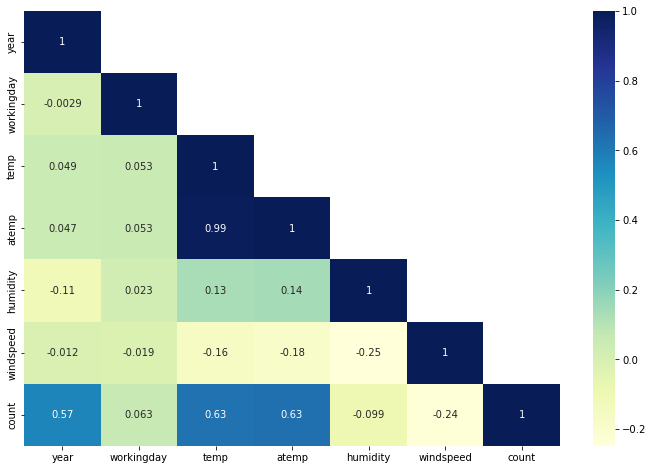

In [13]:
# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bikes.corr(),cmap='YlGnBu',fmt='.2g',annot=True,mask=np.triu(bikes.corr(),+1))

*Observations:*
 - *`temp` and `atemp` are share identical positive correlations with total count of rental bikes.*
 - *`year` also shows a positive correlation.*
 - *`windspeed` shows a negative correlation with demand in bikes.*

#### Drop temeprature variable

In [14]:
bikes.drop(columns='temp', inplace=True)

In [15]:
bikes.head()

,season,year,month,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,0,Jan,Sat,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,Clear,11.46350,43.6957,12.522300,1600


 - *As temp and atemp (or the feels-like temperature) have a correlation of 0.99, we drop the `temperature` column off to avoid multicollinearity.*
 - *Keeping the `atemp` feature makes more sense as people decide to take a bike mostly based on the feels-like temperature than the actual temperature.*

### Data Preparation

1. Convert yes and no to 1 and 0
2. Creating Dummy Variables for the Categorical variables
3. Train-test split
4. Scaling
5. Check correlation
6. Dividing into X and Y sets

#### Convert yes and no to 1 and 0

*`year` and `workingday` are already encoded in 1 & 0.*

#### Creating Dummy Variables for the Categorical variables

In [16]:
# Create dummies for the categorical features
# get_dummies() returns a new dataframe
seasons = pd.get_dummies(bikes['season'], drop_first=True)
months = pd.get_dummies(bikes['month'], drop_first=True)
weather = pd.get_dummies(bikes['weathersit'], drop_first=True)
weekdays = pd.get_dummies(bikes['weekday'], drop_first=True)

In [17]:
# Attach these new dataframes to the bikes dataframe
bikes = pd.concat([bikes, seasons, months, weather, weekdays], axis=1)

In [18]:
bikes.head()

,season,year,month,weekday,workingday,weathersit,atemp,humidity,windspeed,count,...,Oct,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,Sat,0,Mist,18.18125,80.5833,10.749882,985,...,0,0,0,1,0,1,0,0,0,0
1,spring,0,Jan,Sun,0,Mist,17.68695,69.6087,16.652113,801,...,0,0,0,1,0,0,1,0,0,0
2,spring,0,Jan,Mon,1,Clear,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,Tue,1,Clear,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,Wed,1,Clear,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# Remove the categorical features from the bikes dataset ss we have created dummy variables for these categorical columns
bikes.drop(columns=['season','month','weekday','weathersit'], inplace=True)
bikes.head()

,year,workingday,atemp,humidity,windspeed,count,spring,summer,winter,Aug,...,Oct,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Split the data into train and test sets

In [20]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state = 100)

#### Scaling

In [21]:
# Create scaler object
scaler = MinMaxScaler()

In [22]:
# Apply scaling only to numerical features
# fit (Compute the minimum and maximum) and then transform (Scale features of X according to feature_range)
num_var = ['atemp', 'humidity', 'windspeed', 'count']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.sample(5)

,year,workingday,atemp,humidity,windspeed,count,spring,summer,winter,Aug,...,Oct,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
259,0,0,0.524322,0.740231,0.316818,0.516452,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
266,0,0,0.637077,0.888793,0.077563,0.621376,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
119,0,0,0.505301,0.518677,0.414419,0.608606,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
633,1,1,0.679346,0.650064,0.434466,0.887138,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
525,1,0,0.767166,0.554744,0.196528,0.756558,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
df_train.describe()
# All the numeric variables are now mapped between 0 and 1

,year,workingday,atemp,humidity,windspeed,count,spring,summer,winter,Aug,...,Oct,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,...,0.084314,0.080392,0.029412,0.345098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.468282,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,...,0.278131,0.272166,0.169124,0.475867,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check for correlation again (with all numerical data)

<AxesSubplot:>

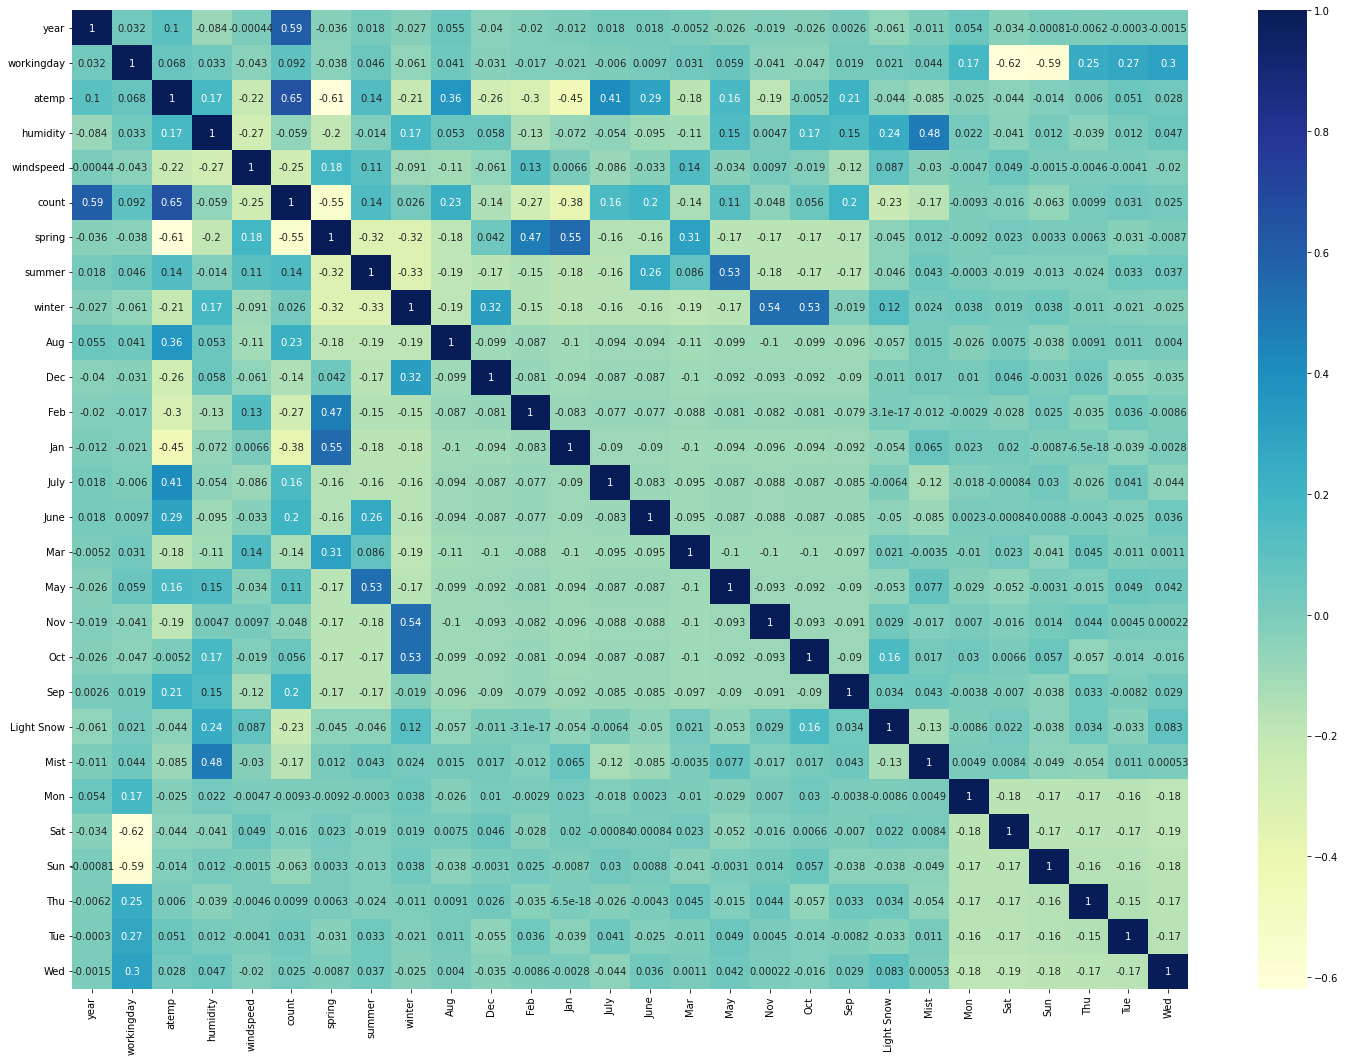

In [24]:
# Draw heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(df_train.corr(),cmap='YlGnBu', annot=True)

*Observation:*
 - *Count of bikes shares the highest correlation with atemp (or feels-like temperature).*

#### Check for linear relation for count vs atemp

<AxesSubplot:xlabel='atemp', ylabel='count'>

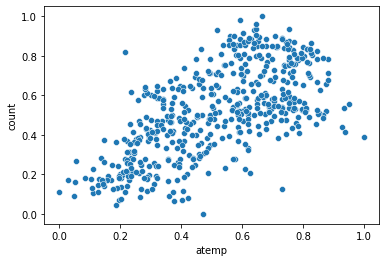

In [25]:
sns.scatterplot(data=df_train, x='atemp', y='count')

 - *`atemp` shares a positive correlation with `count`.*

#### Dividing into X and Y sets for data modelling:

In [26]:
# y is 'count'
y_train = df_train.pop('count')
X_train = df_train

### Data Modelling and Evaluation

#### Build a Linear Regression Model

In [27]:
# Adding Constant
X_train_sm = sm.add_constant(X_train.atemp)

In [28]:
# Create a linear regression model using Ordinary least squares (OLS)
lr = sm.OLS(y_train, X_train_sm).fit()

In [29]:
# Check the parameters obtained
lr.params

const    0.162201
atemp    0.684584
dtype: float64

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           4.77e-62
Time:                        21:39:03   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.0

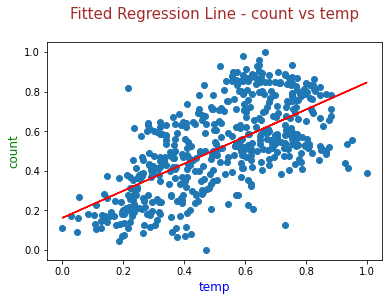

In [31]:
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1622 + 0.6846*X_train_sm.iloc[:, 1], 'r')
# Giving Title to the chart
plt.title('Fitted Regression Line - count vs temp\n',
          fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'brown'})
# Adding labels to Axes
plt.xlabel('temp', fontdict={
           'fontsize': 12, 'fontweight': 5, 'color': 'blue'})
plt.ylabel('count', fontdict={'fontsize': 12,
           'fontweight': 5, 'color': 'green'})
plt.show()

 - *R_squared = 0.420 .i.e 42% of variability in count of rental bikes is explained by the feels-like temperature (atemp).*
 - *The p-value is 0.0 which is lower than 0.05 indicating there's a significant relation between `atemp` and `count`.*
 

 - *We need to identify & add some variables for better prediction.*
 - *As there are too many columns to be checked one by one, we will use automation to select the first 15 variables & then take a manual approach to select variables using their p-values & VIF scores.*

### RFE (Recursive Feature Elimination) for automated selection approach

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [32]:
print(X_train.shape)

(510, 27)


In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 7),
 ('June', False, 6),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11)]

In [35]:
# Top ranked features
col = X_train.columns[rfe.support_]
col

Index(['year', 'workingday', 'atemp', 'humidity', 'windspeed', 'summer',
       'winter', 'Aug', 'Feb', 'Jan', 'Sep', 'Light Snow', 'Mist', 'Sat',
       'Sun'],
      dtype='object')

In [36]:
# Least ranked features
X_train.columns[~rfe.support_]

Index(['spring', 'Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Model 1

#### Get detailed stats using statsmodel

In [37]:
# Creating X_train dataframe with RFE selected variables
X_train1 = X_train[col]
X_train_rfe1 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.05e-188
Time:                        21:39:03   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.039      4.326      0.0

#### Look for multicollinearity using VIF

In [38]:
# Create a dataframe with each feature & their respective VIFs
# X_train contains only the independent variables
# Check for multicollinearity among independent variables
vif = pd.DataFrame({'Features': X_train1.columns, 'VIF': [round(variance_inflation_factor(X_train1.to_numpy(), i), 2) for i in range(X_train1.shape[1])]})
vif.sort_values(by = "VIF", ascending = False, inplace=True)
vif

,Features,VIF
3,humidity,28.77
1,workingday,16.67
2,atemp,14.23
4,windspeed,4.47
13,Sat,4.47
14,Sun,4.40
6,winter,2.44
12,Mist,2.24
5,summer,2.23
0,year,2.08


*Observation:*
 - *The p-value for Feb is 0.162 which is > 0.05. Feb has an insignificant relation with count so let's drop it.*
 - *When it comes down to high p-value & low VIF, the p-value takes precedence over VIF. That's why we remove Feb even when it has a lower VIF value.*

In [39]:
X_train2= X_train1.drop(columns='Feb')

### Model 2

In [40]:
X_train_rfe2 = sm.add_constant(X_train2)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.52e-188
Time:                        21:39:03   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1532      0.037      4.093      0.0

#### Calculate VIF

In [41]:
# Check for multicollinearity among independent variables
vif = pd.DataFrame({'Features': X_train2.columns, 'VIF': [round(variance_inflation_factor(X_train2.to_numpy(), i), 2) for i in range(X_train2.shape[1])]})
vif.sort_values(by = "VIF", ascending = False, inplace=True)
vif

,Features,VIF
3,humidity,27.24
1,workingday,16.08
2,atemp,12.35
4,windspeed,4.37
12,Sat,4.36
13,Sun,4.27
11,Mist,2.23
0,year,2.07
6,winter,2.04
5,summer,1.97


*Observation:*
 - *Dropping 'Feb' didn't change R-squared which further cements it was an insignificant feature.*
 - *Sun has a p-value of 0.052 > 0.05 & VIF = 5.73. High p-value & high VIF. So drop Sun.*

In [42]:
X_train3= X_train2.drop(columns='Sun')

### Model 3

#### Build Model

In [43]:
X_train_rfe3 = sm.add_constant(X_train3)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.87e-189
Time:                        21:39:03   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1971      0.030      6.574      0.0

#### Calculate VIF

In [44]:
# Check for multicollinearity among independent variables
vif = pd.DataFrame({'Features': X_train3.columns, 'VIF': [round(variance_inflation_factor(X_train3.to_numpy(), i), 2) for i in range(X_train3.shape[1])]})
vif.sort_values(by = "VIF", ascending = False, inplace=True)
vif

,Features,VIF
3,humidity,19.69
2,atemp,11.71
1,workingday,4.59
4,windspeed,3.77
11,Mist,2.15
0,year,2.04
6,winter,2.02
5,summer,1.97
12,Sat,1.81
7,Aug,1.56


*Observation:*
 - *The p-values of the features are less than 0.05.*
 - *However the VIF for 'humidity' is 19.69 which is very high. Let's drop it.*

In [45]:
X_train4= X_train3.drop(columns='humidity')

### Model 4

#### Build Model

In [46]:
X_train_rfe4 = sm.add_constant(X_train4)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.96e-186
Time:                        21:39:03   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.022      4.908      0.0

#### Calculate VIF

In [47]:
# Check for multicollinearity among independent variables
vif = pd.DataFrame({'Features': X_train4.columns, 'VIF': [round(variance_inflation_factor(X_train4.to_numpy(), i), 2) for i in range(X_train4.shape[1])]})
vif.sort_values(by = "VIF", ascending = False, inplace=True, ignore_index=True)
vif

,Features,VIF
0,atemp,6.22
1,workingday,4.31
2,windspeed,3.56
3,year,2.04
4,summer,1.93
5,Sat,1.76
6,winter,1.60
7,Mist,1.57
8,Aug,1.56
9,Sep,1.31


*Observation:*
 - *All the p-values are lower than 0.05.*
 - *VIF value for the variable 'atemp' is 6.22.*
 - *F-statistic*:
    - *It tells you whether the overall model fit is significant or not.*
    - *Here, Prob (F-statistic): 3.96e-186 i.e. it's very close to 0 which is less than 0.05, denotes the fit is not by chance.*
 - *R-squared is 83.6% i.e. these predictor variables explain 83.6% of the variability of count of rental bikes.*
<br>
<br>


 - *Earlier we noticed that atemp (or the feels-like temperature) shared the highest correlation with the count of rental bikes used. So dropping them may not be a good idea.*
 - *Let's test it by dropping atemp & checking the R-squared value.*
 - *If it brings the R-squared value down, then we definitely have to keep 'atemp' feature.*

### Model 5

In [48]:
X_train5= X_train4.drop(columns='atemp')

In [49]:
X_train_rfe5 = sm.add_constant(X_train5)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.17e-125
Time:                        21:39:03   Log-Likelihood:                 351.63
No. Observations:                 510   AIC:                            -679.3
Df Residuals:                     498   BIC:                            -628.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4056      0.020     19.875      0.0

In [50]:
# Check for multicollinearity among independent variables
vif = pd.DataFrame({'Features': X_train5.columns, 'VIF': [round(variance_inflation_factor(X_train5.to_numpy(), i), 2) for i in range(X_train5.shape[1])]})
vif.sort_values(by = "VIF", ascending = False, inplace=True)
vif

,Features,VIF
1,workingday,3.44
2,windspeed,3.31
0,year,1.91
3,summer,1.76
10,Sat,1.59
4,winter,1.58
9,Mist,1.57
5,Aug,1.29
6,Jan,1.26
7,Sep,1.16


*Observation:*
 - *The R-squared value was brought down from 0.836 to 0.707.*
 - *Keeping atemp improves R-squared.*
 - *__Skip model 5.__*

*From the __model 4__, we see that the p-values of all the 11 variables are very low (approx equal to 0) and VIF values are also less than 5 except for atemp, which is acceptable.*

### Residual Analysis of the train data

#### Calculate y_predicted

In [51]:
y_train_predicted = lm4.predict(X_train_rfe4)

#### Check if residuals are normally distributed

Text(0.5, 0, 'residuals')

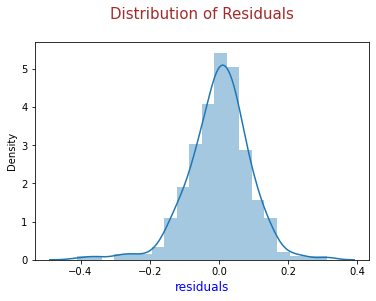

In [52]:
sns.distplot((y_train - y_train_predicted), bins = 20)

# Giving Title to the chart
plt.title('Distribution of Residuals\n',
          fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'brown'})
# Adding labels to Axes
plt.xlabel('residuals', fontdict={
           'fontsize': 12, 'fontweight': 5, 'color': 'blue'})

*As the errors terms are normally distributed with mean = 0, the model is a significant one.*

### Making Predictions

In [53]:
num_vars = ['atemp','humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.sample(5)

,year,workingday,atemp,humidity,windspeed,count,spring,summer,winter,Aug,...,Oct,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
103,0,1,0.503622,0.556892,0.147038,0.373332,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
662,1,1,0.591497,0.824818,0.176436,0.844110,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
264,0,1,0.624674,0.929583,0.184498,0.549126,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
530,1,1,0.683469,0.607556,0.288746,0.879314,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,1,0.671054,0.834693,0.411769,0.489185,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [54]:
# Check if the features are scaled
df_test.describe()

,year,workingday,atemp,humidity,windspeed,count,spring,summer,winter,Aug,...,Oct,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Note: Some of the max values are > 1 here (unlike df_train) because the scaling is done using ranges from train data.m*

### Dividing into X-test and y-test

In [55]:
y_test = df_test.pop('count')
X_test = df_test

In [56]:
y_test.shape

(220,)

In [57]:
X_test.shape

(220, 27)

### Create a LR model for test data

In [58]:
X_test1 = X_test[X_train4.columns]

In [59]:
X_test_sm = sm.add_constant(X_test1)

In [60]:
# Compute y-hat for test data
y_test_predicted = lm4.predict(X_test_sm)

### Model Evaluation

Text(0, 0.5, 'y-test(predicted)')

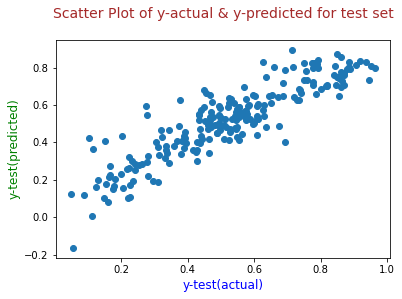

In [61]:
plt.scatter(y_test, y_test_predicted)

# Giving Title to the chart
plt.title('Scatter Plot of y-actual & y-predicted for test set\n',
          fontdict={'fontsize': 14, 'fontweight': 5, 'color': 'brown'})
# Adding labels to Axes
plt.xlabel('y-test(actual)', fontdict={
           'fontsize': 12, 'fontweight': 5, 'color': 'blue'})
plt.ylabel('y-test(predicted)', fontdict={'fontsize': 12,
           'fontweight': 5, 'color': 'green'})

*Observation:*
 - *The predicted values share a linear relationship with the actual values.*

*After you fit a regression model, it is crucial to check the residual plots. If the plots display any patterns, you can’t trust the regression coefficients and other numeric results.*

Text(0, 0.5, 'y-test(actual)')

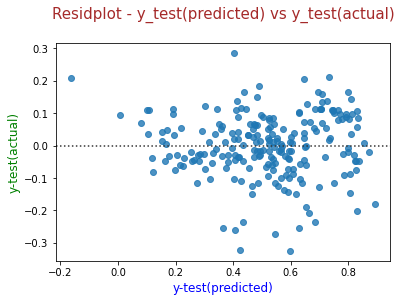

In [62]:
sns.residplot(x=y_test_predicted, y=y_test)

# Giving Title to the chart
plt.title('Residplot - y_test(predicted) vs y_test(actual)\n',
          fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'brown'})
# Adding labels to Axes
plt.xlabel('y-test(predicted)', fontdict={
           'fontsize': 12, 'fontweight': 5, 'color': 'blue'})
plt.ylabel('y-test(actual)', fontdict={'fontsize': 12,
           'fontweight': 5, 'color': 'green'})

*Observation:*
 - *No discernible pattern is observed i.e. the model is significant.*

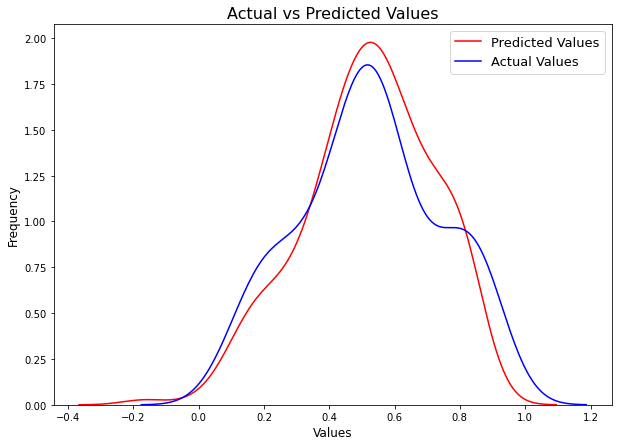

In [63]:
plt.figure(figsize=(10, 7))

sns.distplot(y_test_predicted, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)
plt.show()

*Observation:*
 - *This distribution plot reveals that our prediction values have performed closely to our actual values but there are some outliers that can be noticed.*

### Compare R-squared of train and test

#### Calculating R-squared value for Train set

In [64]:
r2_train = r2_score(y_train, y_train_predicted)
r2_train

0.835736005043672

#### Calculating R-squared value for Test set

In [65]:
r2_test=r2_score(y_test, y_test_predicted)
r2_test

0.7957958255002324

In [66]:
print('R-squared of TRAIN set:', r2_train)
print('R-squared of TEST set:', r2_test)

R-squared of TRAIN set: 0.835736005043672
R-squared of TEST set: 0.7957958255002324


*Observation:*
 - *The difference between the R-squared value for the train and test datasets are not more than 5%, therefore it's a good model.*
 - *This means that our model can explain 84% of the variability in train data and 80% of the variability in test data.*

### Calculate the Mean Squared Error, Root Mean Squared Error and Mean Absolute error

In [67]:
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))

MSE: 0.00976387547612297
RMSE: 0.09881232451533042
MAE: 0.07638907911679196


*Observation:*
 - *Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets.*

### Linear regression equation

Equation of our best fitted line is

count = *0.1057 + 0.2347 x year + 0.0544 x workingday + 0.5097 x atemp - 0.1431 x windspeed + 0.0907 x summer + 0.1198 x winter + 0.0618 x Aug - 0.0479 x Jan + 0.1132 x Sep - 0.2824 x Light Snow - 0.0825 x Mist + 0.0651 x Sat*

Overall we have a decent model.

From the regression model above, the following variables and their coefficients are significant in predicting the demand for rental bikes:

 - atemp = 0.509695
 - year = 0.234685
 - winter = 0.119826
 - Sep = 0.113162
 - const = 0.105717
 - summer = 0.090741
 - Sat = 0.065145
 - Aug = 0.061799
 - workingday = 0.054446
 - Jan = -0.047886
 - Mist = -0.082529
 - windspeed = -0.143112
 - Light Snow = -0.282387


Top 3 significant variables that influence the deamnd in bikes:

 - *atemp (or feels-like temperature)*
 - *year*
 - *winter*

*Any increase in these 3 features will result in increase in demand in rental bikes.*

*Generally,*
 - *People rent bikes most often during fall and summer; they prefer it least during spring.*
 - *Bikes have high demand when the skies are clear or partly cloudy & least wanted during light or heavy shower/snow.*
 - *Demand for bikes has increased considerably from the year 2018 to 2019.*
 - *People use bikes most often from June to September, peaking at September.*
 - *Average count of bikes are similar across weekdays with increased variations on Saturday & Wednesday.*
 - *People prefer to use bikes slightly higher during working days.*
 - *Need for bikes goes down as the humidity or windspeed climbs up.*